#Image Enhacement Task
 **TODOs**:

* What will happen if we averaged noisy images with each others? Average the same image at multiple random noise levels (gaussian sigmas)
* apply negative transform on image negative.png

* Implement gamma correction and test it for dark.png
* Try the histogram equalization on bad_kid.tif

In [ ]:
import cv2
import numpy as np
from scipy.signal import correlate2d
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

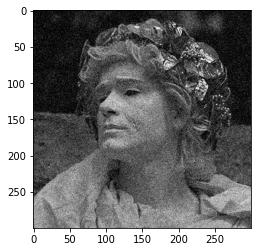

In [ ]:
image = cv2.imread('/content/300px-Kodim17_noisy.jpg')
plt.imshow(image)

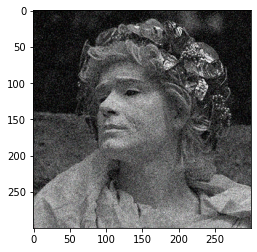

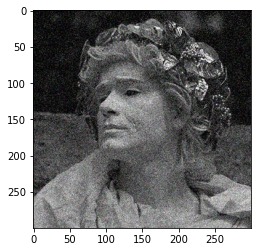

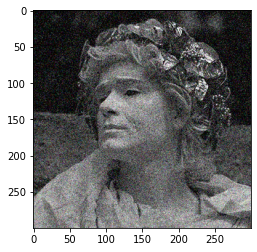

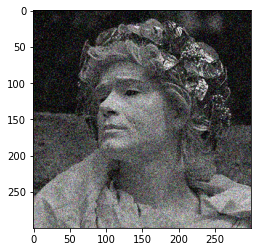

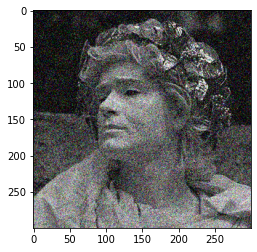

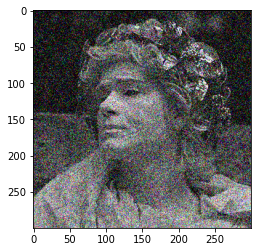

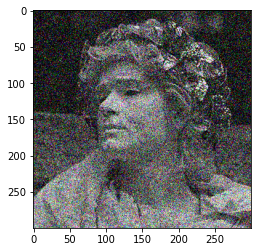

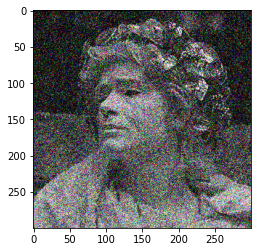

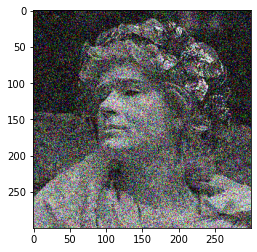

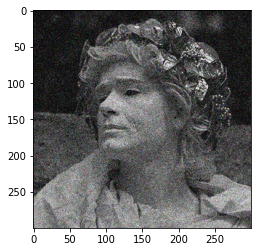

In [ ]:
noisy_images = []

for sigma in [5, 10, 15,20,30,45,50,55,60]:
    noise = np.random.normal(loc=0, scale=sigma, size=image.shape)#create gaussian noise with zero mean
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)#adding noise to the image
    plt.figure();
    plt.imshow(noisy_image);
    noisy_images.append(noisy_image)

# Compute average image
averaged_noisy_images = np.mean(noisy_images, axis=0).astype(np.uint8)

# Save output image
cv2.imwrite('output.jpg', averaged_noisy_images)
plt.figure();
plt.imshow(averaged_noisy_images);

What will happen if we averaged noisy images with each others? Average the same image at multiple random noise levels (gaussian sigmas)

the noise decreases when averaging noisy images

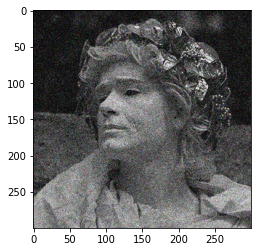

In [ ]:
plt.figure();
plt.imshow(averaged_noisy_images);

apply negative transform on image negative.png



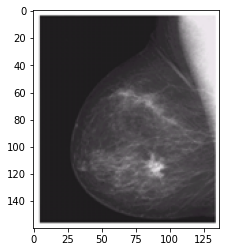

In [ ]:
image = cv2.imread('/content/negative.png')
plt.imshow(image)


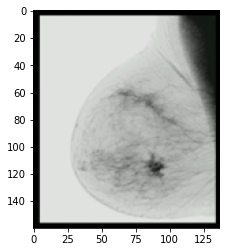

In [ ]:
Negativ_trans=255-image
plt.imshow(Negativ_trans)

Implement gamma correction and test it for dark.png


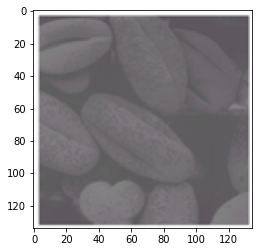

In [ ]:
image = cv2.imread('/content/dark.png')
plt.imshow(image)


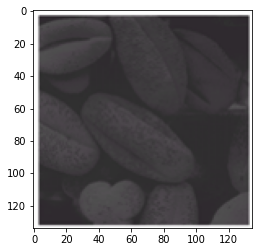

In [ ]:
gamma=1.69
Gamma_correct=np.power(image/255,gamma)*255
plt.imshow(Gamma_correct.astype(np.uint8))


Try the histogram equalization on bad_kid.tif

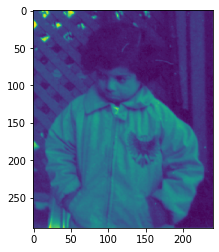

In [ ]:
image = cv2.imread('/content/bad_kid.tif', cv2.COLOR_BGR2GRAY)
plt.imshow(image)


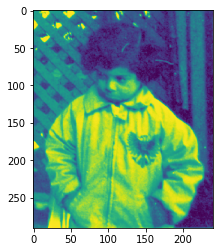

In [ ]:
equalization = cv2.equalizeHist(image)
plt.figure();
plt.imshow(equalization);

#image manipulation Task
- Steganography

In [ ]:
def binary_to_str(binary):
    try:
        int(len(binary) / 8)
    except Exception as e:
        raise Exception('Binary length is not multiple of 8')

    string = ''

    for i in range(len(binary) // 8):
        integer = int(''.join([str(bit) for bit in binary[8 * i:8 * (i + 1)].tolist()]), 2)
        ascii_character = chr(integer)
        string += ascii_character

    return string

In [ ]:
def decode_lsb(image_path):
    # STEP 1: Read the image
    image = cv2.imread(image_path, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)

    shape=image.shape
    bits=[]

    # STEP 2: Iterate over image row by row and get pixel value
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixel=image[i,j]
            chanel=pixel[0]
             # STEP 2.2: read last bit (EVEN or ODD)
            LSB=chanel & 1
    # STEP 2.1: Get first channel value
    # STEP 2.3: Add this bit to a list
            bits.append(LSB)
    # STEP 2.4: call helper method (binary_to_str) to return & print ascii_string
    result=binary_to_str(bits)
    return result

"You weren't supposed to find this!"¸ (]»!:L²â7ñÓN°Ã!K,Õ,¾3hÆLÇË83o@Xµg²»Õ+
z5Pç iåsSbS]]ð8$¥×±ÆöÖE
Hãà(6´;¨`¦mÓÈsÓN9+çà2ìðt´É`Ðm~ *ÁßâçGWskNÿ
«ýSÞRBÂ³¼^z¹4"×Jê
ðÅwçAÛÈöÒ6:ÓóXôPüuw}ªE*9É¹eC<÷b>[)ßaZp'°a0DÑõL1&eFæ½ñ2h°iÜz>n¶«¹éû×z5	Ç*e­!!NûíóÌÄ L¸CIrÆ=DpFô!5ÝºÁÅxÐ6n««wý´Í<ù¯¬ÇTÆ Þn)Gi±y\Ý¡ "(¶/â£ 6Dè­\@ô@ÅBÜÛO¦;9 Î³Y `#Ò6ô`ÊBBz|½/ó*Þõhâ?9D£W¿èêGÎÃ iÊXðæ2J¼³ÌåQ/é¸kÝÄS(ê"DÕËw,Ì ì:	·s'9Ý
9KEtÌ³
Z·1Ñî§.ÜUÖæÊª%»ðÊ&Ûå¤l\yÀç;©FqÒÒýÇ¨¸5Z·¾¦'0xp®|? {åÀsHøWÔÂMi6<Ö..wÇ ÁiºêçzE
úöóJbL[Óó3ãBdq
À²bJôÝ±þÈ¬<¬wÒººiB©úÛmÄóÔô2ðìTH[-pEj£ õº`éí§¶î{Eþ}Ê#^~¨ø)&N¤ø±É]{ÈoX?÷{>ÞâÏµÙdl½p ÿ½îF sgåÞ#ÿ©Ü b
¼Y·üÖQ$PRà~Vó£6Om¦,ÌLÐE¸0ÑÔ£xL5=V ÉáÊ ?/×þÔÅPL5¡ÂÞº
»P¸=ZÃµ  E«ãp}ÞîR®ÆðüDúÇçYÒÕ§¼@Ïå1\Îw5×z9ô¯ìªöúPµeÐ@\R$fÃ63?ì:o:èßÇ%§¿kúÊoNQ/
©{ß« ­®IG±_5óÎêQá^V«ý@´µÆ©\
¼æÖÅAO¤ì@q»1«)Àiú$<ð2Üþ<ä¡K¸©:ºá©(»èj"Öl@

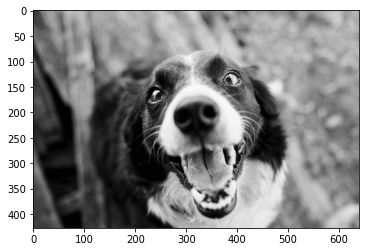

In [ ]:
secret_message = decode_lsb('/content/secret-happy-dog.png')
print(secret_message)